In [33]:
import seaborn

import swasputils

In [2]:
classifications = swasputils.ZooniverseClassifications().get_workflow(7534)

C:\Users\anm83\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\anm83\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
classification_counts = classifications.count_annotations()

In [20]:
classification_fracs = classification_counts.apply(lambda x: x/x.sum(), axis=1)

In [43]:
classification_fracs.head()

annotation_T0,EA/EB type,EW type,Junk,Pulsator,Rotator,Unknown
subject_ids,,,,,,
21803099,0.0,0.0,1.0,0.0,0.0,0.0
21803103,1.0,0.0,0.0,0.0,0.0,0.0
21803109,0.0,0.0,1.0,0.0,0.0,0.0
21803115,1.0,0.0,0.0,0.0,0.0,0.0
21803118,0.0,0.0,1.0,0.0,0.0,0.0


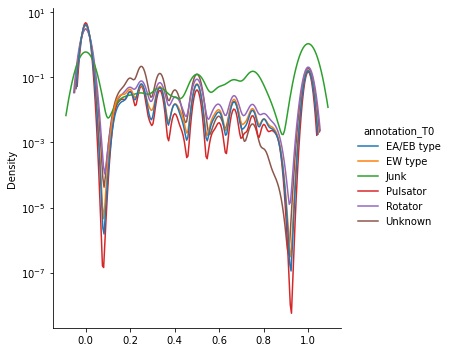

In [47]:
seaborn.displot(data=classification_fracs, log_scale=(False, True), kind='kde')

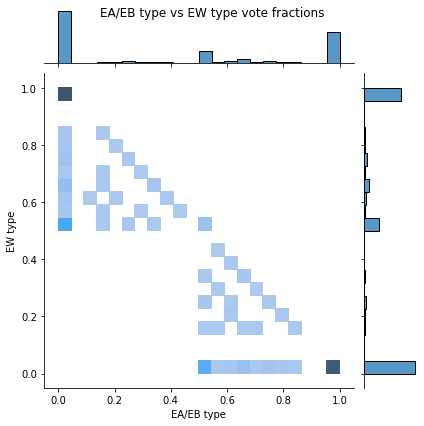

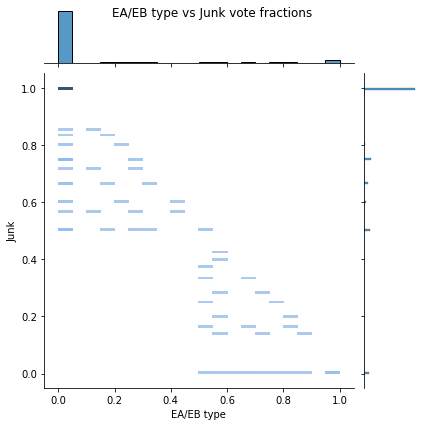

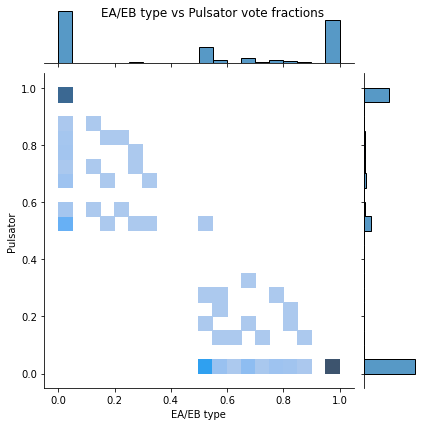

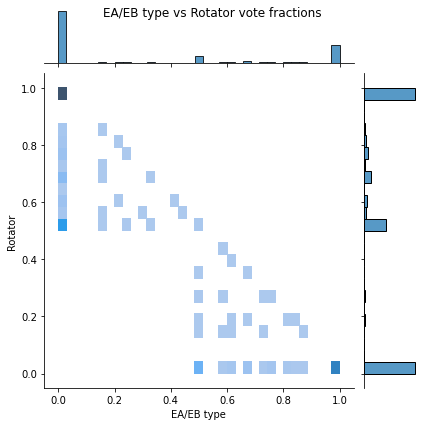

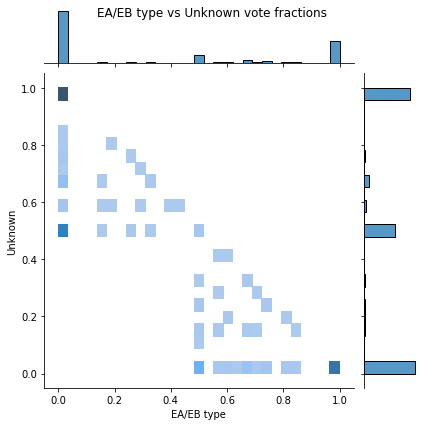

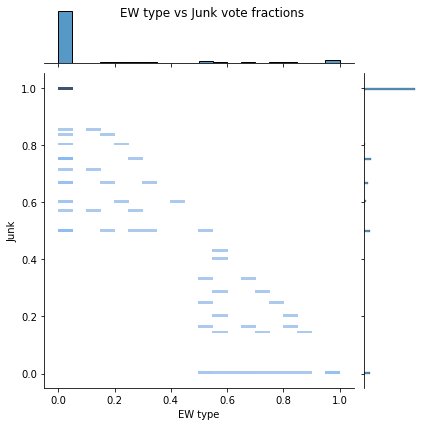

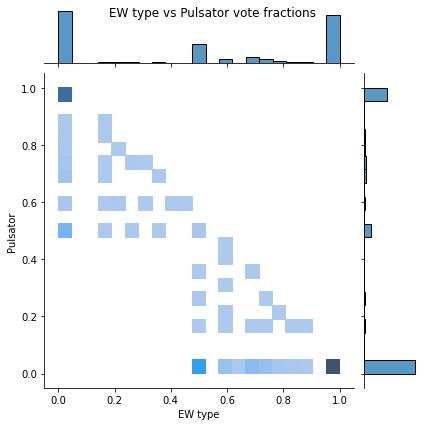

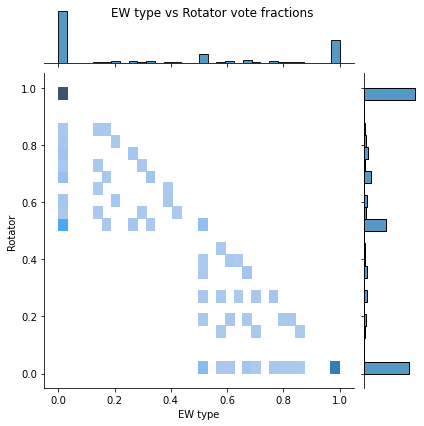

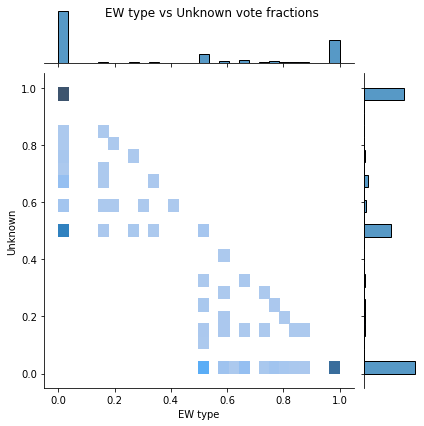

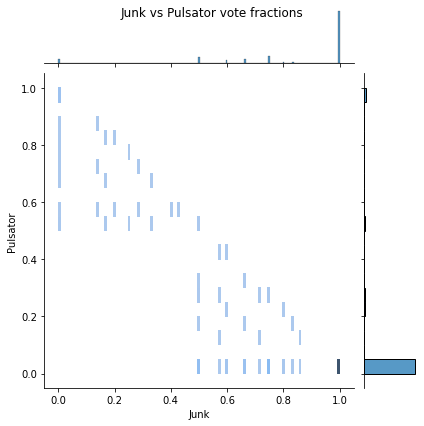

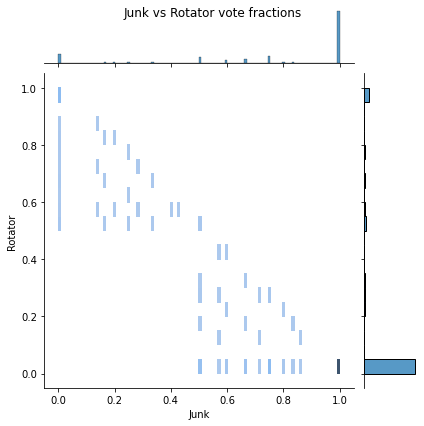

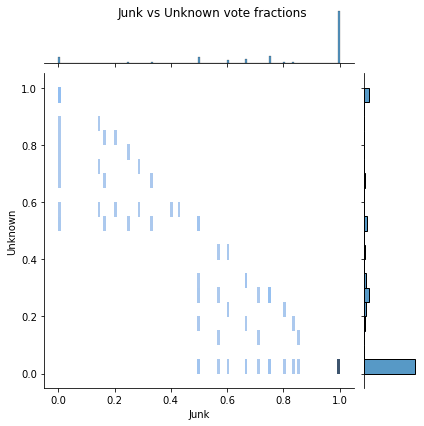

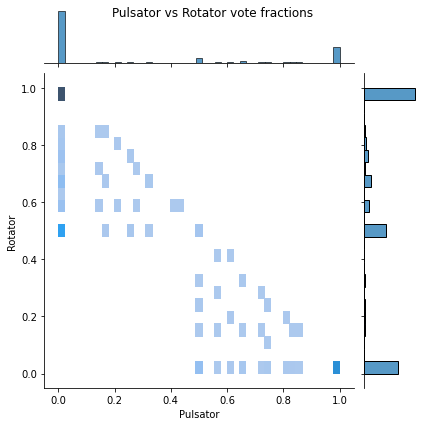

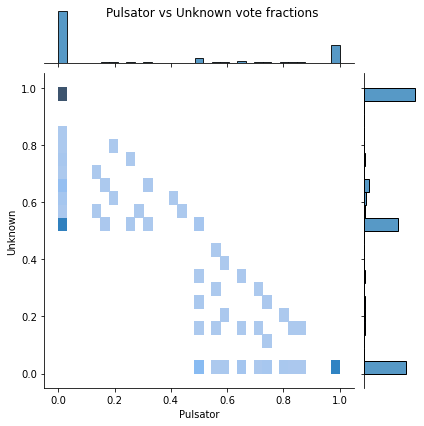

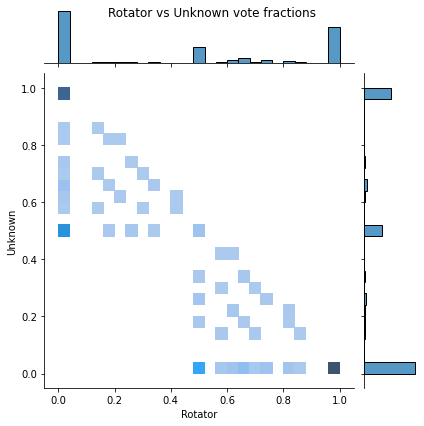

In [49]:
plotted_combos = set()
for x_type in classification_fracs.keys():
    for y_type in classification_fracs.keys():
        if x_type == y_type or (y_type, x_type) in plotted_combos:
            continue

        p = seaborn.jointplot(
            data=classification_fracs[(classification_fracs[x_type] >= 0.5) | (classification_fracs[y_type] >= 0.5)],
            x=x_type,
            y=y_type,
            kind='hist',
        )
        p.fig.suptitle('{} vs {} vote fractions'.format(x_type, y_type))
        plotted_combos.add((x_type, y_type))